In [2]:
import pandas as pd
import plotly.graph_objects as go

In [3]:
df = pd.read_csv(r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Bitcoin Case Study\bitcoin_price_Training - Training.csv')

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Focus only on 2016 data (plus Dec 2015 to ensure smooth continuity at the start)
df_2016 = df.loc[(df.index.year == 2016) | (df.index.to_period('M') == '2015-12')].copy()

# ---- Largest Drawdown ----
# cummax() finds the running peak → drawdown = (price - peak)/peak
df_2016['Close_peak'] = df_2016['Close'].cummax()
df_2016['Drawdown'] = (df_2016['Close'] - df_2016['Close_peak']) / df_2016['Close_peak']
drawdown_max_val = df_2016['Drawdown'].min()        # worst drop in %
drawdown_max_idx = df_2016['Drawdown'].idxmin()     # get the worst drop index

# ---- Largest Rally ----
window = 7              # rolling change over 7 periods (7 days since data is daily)
rally_threshold = 0.1

df_2016['Rally'] = df_2016['Close'].pct_change(periods=window)
rally_max_val = df_2016['Rally'].max()      # strongest gain %
rally_max_idx = df_2016['Rally'].idxmax()   # get the strongest gain index

# Keep only 2016 dates (drop the Dec 2015 warm-up)
df_2016 = df_2016.loc[(df_2016.index.year == 2016)]

# ---- Plotting ----
fig = go.Figure()

# Line plot of closing prices
fig_line = go.Scatter(
    x=df_2016.index,
    y=df_2016['Close'],
    mode='lines',
    name='Close Price'
)

# Mark the largest drawdown
fig_drawdown = go.Scatter(
    x=[drawdown_max_idx],
    y=[df_2016.loc[drawdown_max_idx, 'Close']],
    mode='markers+text',
    marker=dict(color='red', size=10),
    text=f'Crash {drawdown_max_val*100:.1f}%',
    textposition='bottom center',
    name='Largest Drawdown'
)

# Mark the largest rally
fig_rally = go.Scatter(
    x=[rally_max_idx],
    y=[df_2016.loc[rally_max_idx, 'Close']],
    mode='markers+text',
    marker=dict(color='green', size=10),
    text=f'Rally {rally_max_val*100:.1f}%',
    textposition='top center',
    name='Largest Rally'
)

# Add all plots to the figure
fig.add_traces([fig_line, fig_drawdown, fig_rally])

fig.update_layout(
    title='Bitcoin Price Movements with Largest Crash and Rally'\
          '<br><sub>Case Study: Year 2016</sub>',
    xaxis_title='Date',
    yaxis_title='Closing Price (USD)'
)

fig.show()

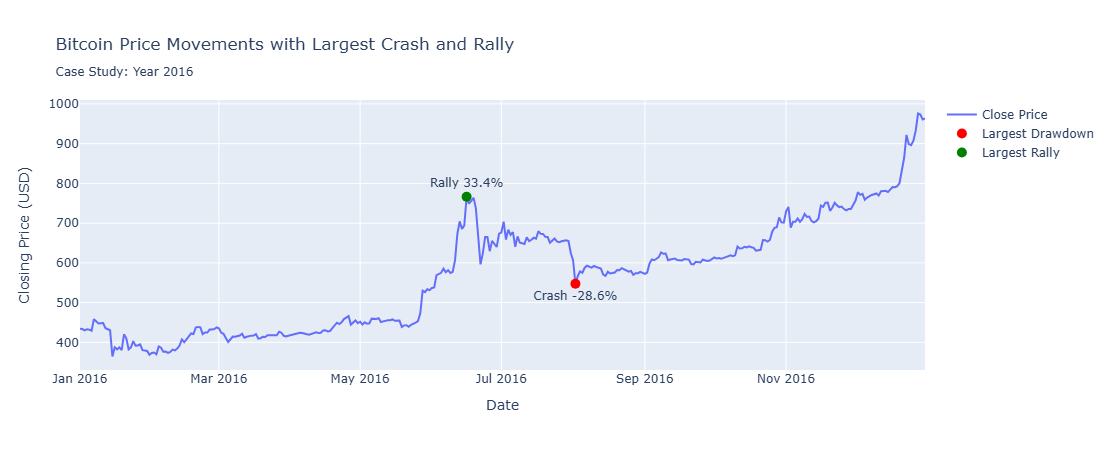

In [1]:
# Display the saved plot as a static image as Plotly interactive charts cannot be rendered directly on GitHub

from IPython.display import Image

Image(
    filename=r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Bitcoin Case Study\Own_Exercises\Crash_Rally_Analysis.png'
)